# Section 3.6 — Statistical design and error analysis

This notebook contains the code examples from [Section 3.6 Statistical design and error analysis]() of the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Plot helper functions
from ministats import plot_pdf
from ministats.utils import savefigure

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
# RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/stats/design"

<Figure size 640x480 with 0 Axes>

In [4]:
# set random seed for repeatability
np.random.seed(42)

## Definitions

Design params: n = 9 , alpha = 0.05 , beta = 0.910663745890349 , Delta = 0.2 , d = 0.1 , CV = 1.0965690846343148
Saved figure to figures/stats/design/H0_rejection_region.pdf
Saved figure to figures/stats/design/H0_rejection_region.png


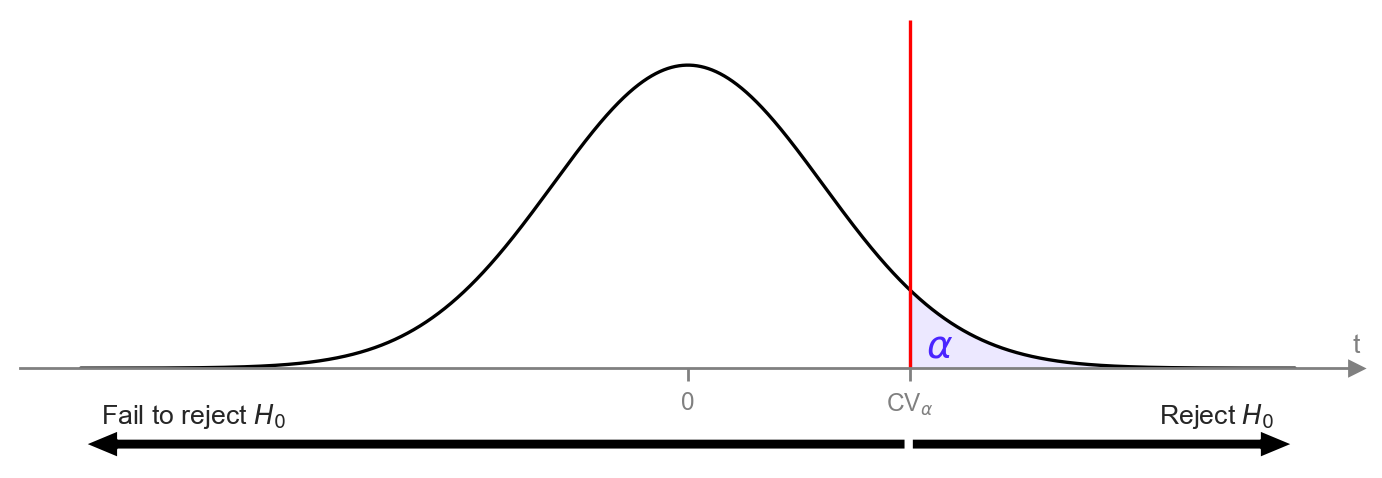

In [5]:
# FIGURES ONLY
filename = os.path.join(DESTDIR, "H0_rejection_region.pdf")
from ministats import plot_alpha_beta_errors
with sns.axes_style("ticks"), plt.rc_context({"figure.figsize":(7,2.5)}):
    ax = plot_alpha_beta_errors(cohend=0.1, ax=None, xlims=[-3,3], n=9, show_alt=False, show_concl=True, alpha_offset=(0.06,0.013))
    savefigure(ax, filename)

Design params: n = 9 , alpha = 0.05 , beta = 0.2250805806658559 , Delta = 1.6 , d = 0.8 , CV = 1.0965690846343148
Saved figure to figures/stats/design/H0_HA_distributions_cvalue.pdf
Saved figure to figures/stats/design/H0_HA_distributions_cvalue.png


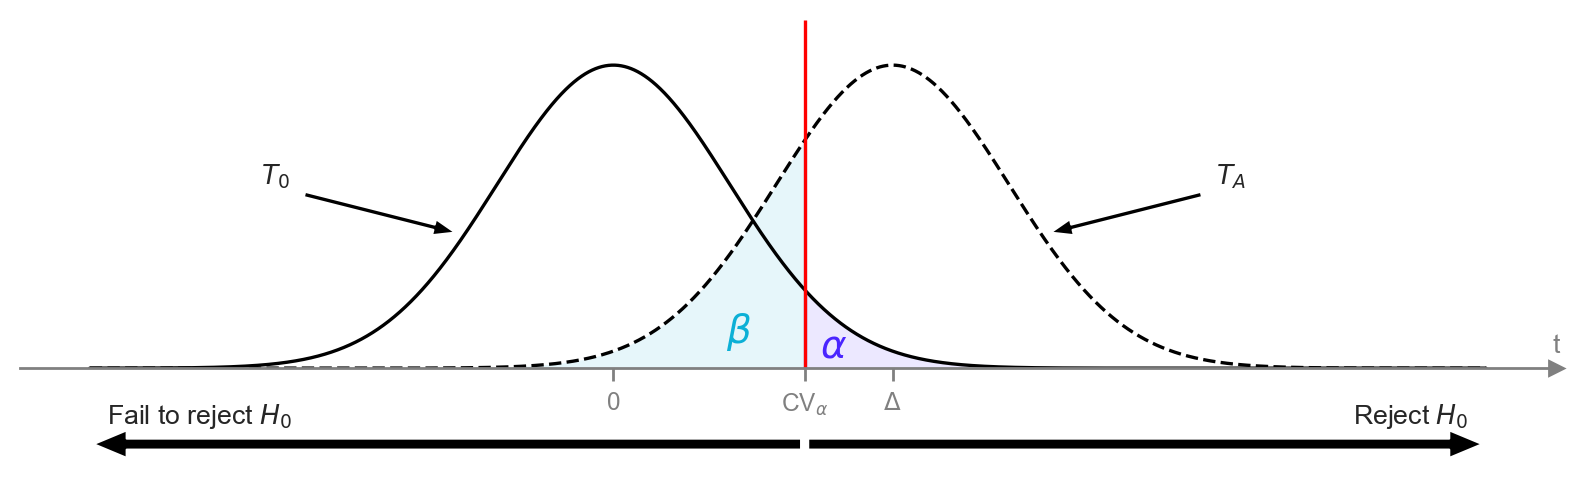

In [6]:
# FIGURES ONLY
filename = os.path.join(DESTDIR, "H0_HA_distributions_cvalue.pdf")
from ministats import plot_alpha_beta_errors

with sns.axes_style("ticks"), plt.rc_context({"figure.figsize":(8,2.5)}):
    ax = plot_alpha_beta_errors(cohend=0.8, show_dist_labels=True, show_concl=True,
                                alpha_offset=(0.06,0.013), beta_offset=(-0.06,0.02))

savefigure(ax, filename)

## Hypothesis decision rules

### Decision rule based on $p$-values

```Python
# pre-data
alpha = ...   # chosen in advance

# post-data
obst = ...    # calculated from sample
rvT0 = ...    # sampling distribution under H0
pvalue = ...  # prob. of obst under rvT0

# make decision based on p-value
if pvalue <= alpha:
    decision = "Reject H0"
else:
    decision = "Fail to reject H0"
```

### Simplified decision rule


```Python
# pre-data
alpha = ...     # chosen in advance
rvT0 = ...      # sampling distribution under H0
CV_alpha = ...  # calculated from alpha-quantile of rvT0

# post-data
obst = ...      # calculated from sample
# make decision based on test statistic
if obst >= CV_alpha:
    decision = "Reject H0"
else:
    decision = "Fail to reject H0"
```

## Statistical design

Design params: n = 15 , alpha = 0.05 , beta = 0.8079200023112518 , Delta = 0.4 , d = 0.2 , CV = 0.8493987605509224
Design params: n = 15 , alpha = 0.05 , beta = 0.28680362819561334 , Delta = 1.14 , d = 0.57 , CV = 0.8493987605509224
Design params: n = 15 , alpha = 0.05 , beta = 0.07303790512845224 , Delta = 1.6 , d = 0.8 , CV = 0.8493987605509224
Design params: n = 15 , alpha = 0.05 , beta = 0.0003494316033385532 , Delta = 2.6 , d = 1.3 , CV = 0.8493987605509224
Saved figure to figures/stats/design/panel_beta_for_different_effect_sizes.pdf
Saved figure to figures/stats/design/panel_beta_for_different_effect_sizes.png


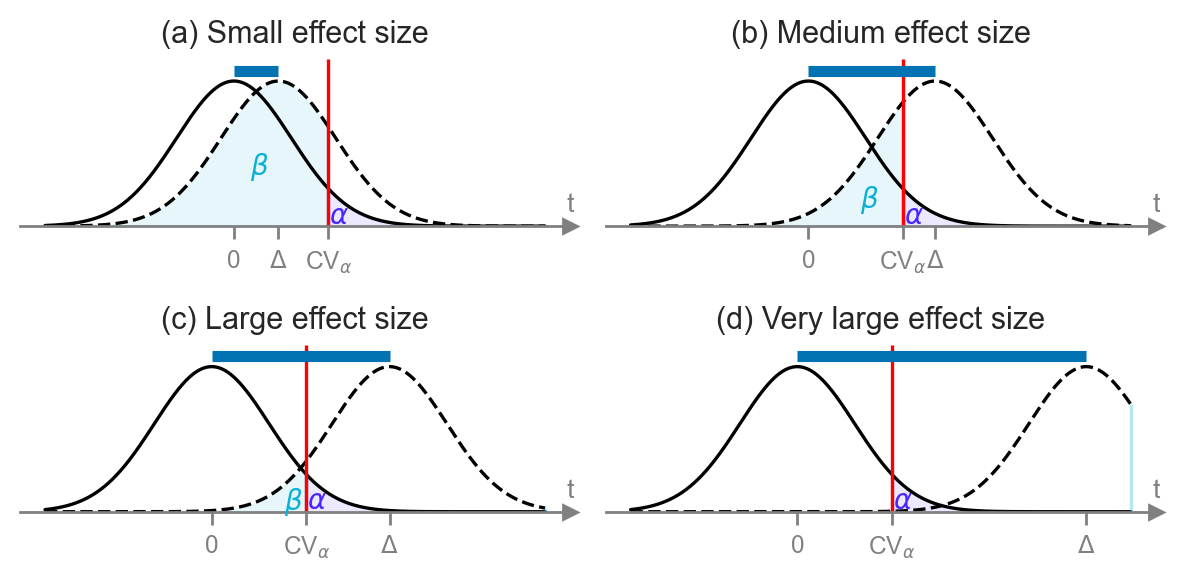

In [7]:
# FIGURES ONLY
filename = os.path.join(DESTDIR, "panel_beta_for_different_effect_sizes.pdf")
d_small = 0.20
d_medium = 0.57 # chosen to avoid overlap between CV and Delta
d_large = 0.80
d_vlarge = 1.3

with sns.axes_style("ticks"):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(6,3))
    
    plot_alpha_beta_errors(cohend=d_small,  xlims=[-1.7,2.8], n=15, ax=ax1, fontsize=10, show_es=True,
                           alpha_offset=(-0.03,0.005), beta_offset=(0.1,0.2))
    ax1.set_title("(a) Small effect size", fontsize=11)
    
    plot_alpha_beta_errors(cohend=d_medium, xlims=[-1.6,2.9], n=15, ax=ax2, fontsize=10, show_es=True,
                           alpha_offset=(-0.03,0.005), beta_offset=(0.05,0.08))
    ax2.set_title("(b) Medium effect size", fontsize=11)
    
    plot_alpha_beta_errors(cohend=d_large,  xlims=[-1.5,3], n=15, ax=ax3, fontsize=10, show_es=True,
                           alpha_offset=(-0.03,0.005), beta_offset=(0,0.02))
    ax3.set_title("(c) Large effect size", fontsize=11)
    
    plot_alpha_beta_errors(cohend=d_vlarge,  xlims=[-1.5,3], n=15, ax=ax4, fontsize=10, show_es=True,
                           alpha_offset=(-0.03,0.005), beta_offset=(-0.06,0.02))
    ax4.set_title("(d) Very large effect size", fontsize=11)
    
    savefigure(fig, filename)

Design params: n = 15 , alpha = 0.05 , beta = 0.24858908649659617 , Delta = 1.2 , d = 0.6 , CV = 0.8493987605509224
Design params: n = 30 , alpha = 0.05 , beta = 0.0503487295055579 , Delta = 1.2 , d = 0.6 , CV = 0.6006156235170058
Saved figure to figures/stats/design/panel_beta_for_different_sample_sizes.pdf
Saved figure to figures/stats/design/panel_beta_for_different_sample_sizes.png


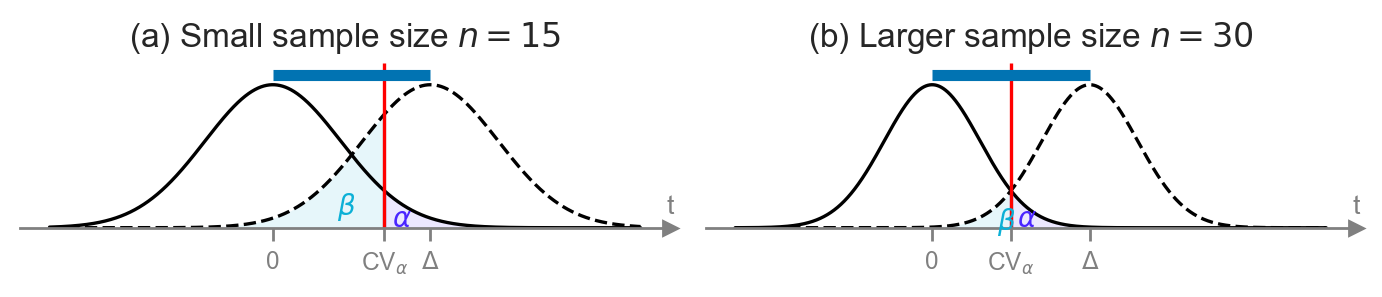

In [8]:
# FIGURES ONLY
filename = os.path.join(DESTDIR, "panel_beta_for_different_sample_sizes.pdf")
Delta = 0.6


with sns.axes_style("ticks"):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,1.6))
    
    n1 = 15
    plot_alpha_beta_errors(cohend=Delta,  xlims=[-1.7,2.8], n=n1, ax=ax1, fontsize=10, show_es=True,
                           alpha_offset=(0.03,0.005), beta_offset=(0,0.05))
    ax1.set_title(f"(a) Small sample size $n={n1}$", fontsize=12)
    
    n2 = 30
    plot_alpha_beta_errors(cohend=Delta,  xlims=[-1.5,3], n=n2, ax=ax2, fontsize=10, show_es=True,
                           alpha_offset=(0.005,0), beta_offset=(0.04,0.01))
    ax2.set_title(f"(b) Larger sample size $n={n2}$", fontsize=12)
    
    savefigure(fig, filename)

Design params: n = 15 , alpha = 0.05 , beta = 0.24858908649659617 , Delta = 1.2 , d = 0.6 , CV = 0.8493987605509224
Design params: n = 15 , alpha = 0.1 , beta = 0.14865057213685162 , Delta = 1.2 , d = 0.6 , CV = 0.6617903827547039
Saved figure to figures/stats/design/panel_beta_for_different_alphas.pdf
Saved figure to figures/stats/design/panel_beta_for_different_alphas.png


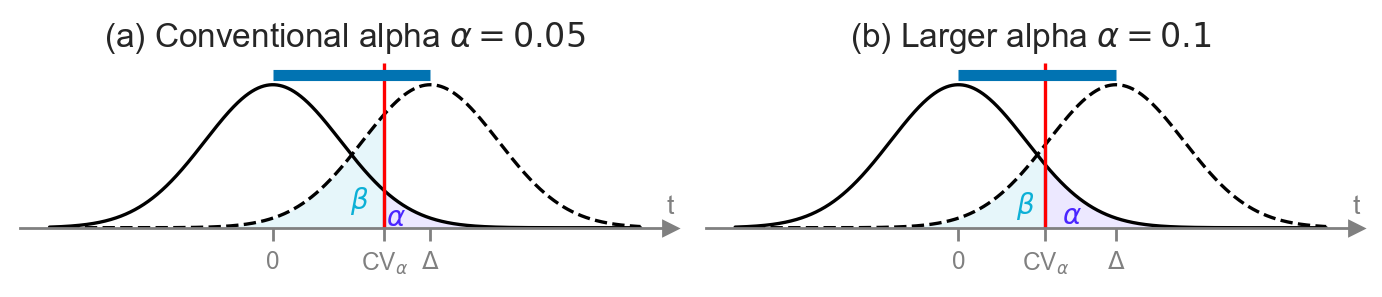

In [9]:
# FIGURES ONLY
filename = os.path.join(DESTDIR, "panel_beta_for_different_alphas.pdf")
Delta = 0.6

with sns.axes_style("ticks"):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,1.6))
    
    n1 = 15
    alpha1 = 0.05
    plot_alpha_beta_errors(alpha=alpha1, cohend=Delta, xlims=[-1.7,2.8], n=15, ax=ax1, fontsize=10, show_es=True,
                           alpha_offset=(-0.02,0.005), beta_offset=(0.1,0.1))
    ax1.set_title(r"(a) Conventional alpha $\alpha=0.05$", fontsize=12)
    
    
    alpha2 = 0.1
    plot_alpha_beta_errors(alpha=alpha2, cohend=Delta, xlims=[-1.7,2.8], n=15, ax=ax2, fontsize=10, show_es=True,
                           alpha_offset=(0,0.005), beta_offset=(0.05,0.05))
    ax2.set_title(r"(b) Larger alpha $\alpha=0.1$", fontsize=12)
    
    savefigure(fig, filename)

### Cohen's d standardized effect size

The effect size $\Delta$ we use in statistical design is usually expressed as a standardized effect size
like Cohen's $d$, which is defined as the observed "difference" divided by a standard deviation
of the theoretical model under the null hypothesis.


#### One-sample case

For a one-sample test of the mean relative to a null model with mean $\mu_0$,
Cohen's $d$ is calculated as:

$$
  d = \frac{\overline{\mathbf{x}} - \mu_0}{ s_{\mathbf{x}} },
$$

where $s_{\mathbf{x}}$ is the sample standard deviation.

When doing statistical design,
we haven't obtained the sample $\mathbf{x}$ yet so we don't know what its standard deviation $s_{\mathbf{x}}$ will be,
so we have to make an educated guess of this value,
which usually means using the standard deviation of the theoretical model $\sigma_{X_0}$.


#### Two-sample case

For a two-sample test for the difference between means, Cohen's $d$ is defined as the difference between sample means divided by the pooled standard deviation:

$$
  d = \frac{\overline{\mathbf{x}} - \overline{\mathbf{y}} }{ s_{p} }.
$$

where the formula for the pooled variance is
$s_{p}^2 = [(n -1)s_{\mathbf{x}}^2 + (m -1)s_{\mathbf{y}}^2]/(n + m -2)$.

When doing statistical design,
we don't know the standard deviations $s_{\mathbf{x}}$ and $s_{\mathbf{y}}$
so we replace them with the theoretical standard deviations $\sigma_{X_0}$ and $\sigma_{Y_0}$ under the null hypothesis.

Recall [table of reference values](https://en.wikipedia.org/wiki/Effect_size#Cohen's_d) for Cohen's $d$ standardized effect sizes, suggested by Cohen in (Cohen YYYY TODO).

| Cohen's d   | Effect size |
| ----------- | ----------- |
| 0.01        | very small  |
| 0.20        | small       |
| 0.50        | medium      |
| 0.80        | large       |


The formulas for sample size planning and power calculations
we'll present below are based on Cohen's $d$.

This means you'll have to express your guess about the effect size $\Delta$
as $d = \frac{\Delta}{\sigma_0}$ where $\sigma_0$ is your best about the standard deviation
of the theoretical distribution.

Note Cohen's $d$ is based on the standard deviations of the "raw" theoretical population,
and not standard error.

## Example 1: detect kombuncha volume deviation from theory

Design Type A: choose $\alpha=0.05$, $\beta=0.2$, $\Delta_{\textrm{min}} = 4\;\text{ml}$ then calculate required sample size $n$.
We'll assume $\sigma=10$.

In [10]:
alpha = 0.05
beta = 0.2
Delta_min = 4

# assumption
sigma = 10

In [11]:
from scipy.stats import norm
rvZ = norm(loc=0, scale=1)

z_u = rvZ.ppf(1-alpha)
z_l = rvZ.ppf(beta)

n_approx = (z_u - z_l)**2 * sigma**2 / Delta_min**2
n_approx

38.64098270012354

### Using `statsmodels`

To use the `statsmodels` sample size estimation function,
we'll need to express the effect size $\Delta=4$ in terms of Cohen's $d$.

In [12]:
d = Delta_min / sigma
d

0.4

In [13]:
from statsmodels.stats.power import TTestPower
ttp = TTestPower()
n = ttp.solve_power(effect_size=d, alpha=0.05, power=0.8,
                    alternative="larger")
n

40.029076820565

Saved figure to figures/stats/design/plot_one_sample_t_power_vs_sample_size.pdf
Saved figure to figures/stats/design/plot_one_sample_t_power_vs_sample_size.png


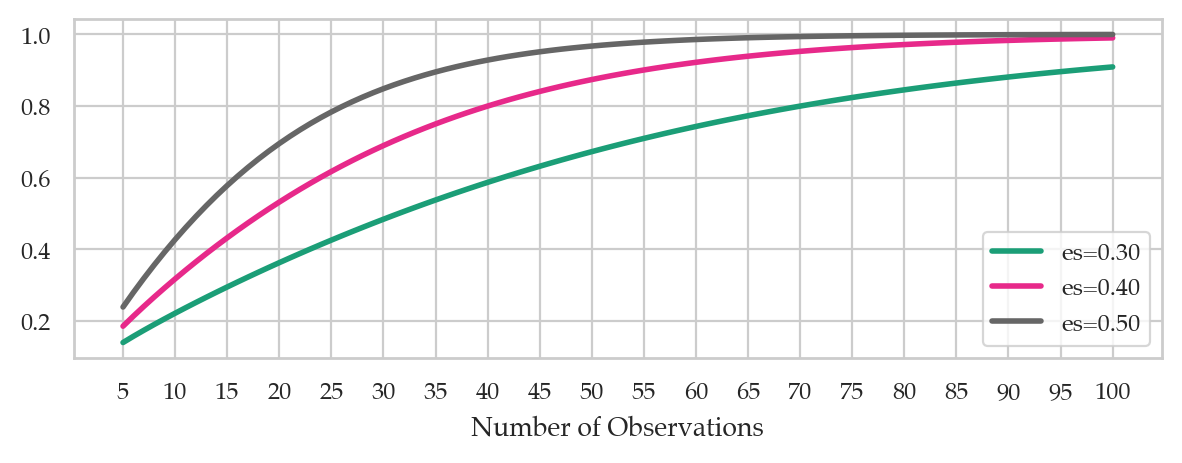

In [14]:
filename = os.path.join(DESTDIR, "plot_one_sample_t_power_vs_sample_size.pdf")
ds = np.array([0.3, 0.4, 0.5])
ns = np.arange(5, 101)
fig, ax = plt.subplots(figsize=(6,2.4))
ttp.plot_power(dep_var="nobs", ax=ax,
               effect_size=ds, nobs=ns, alpha=0.05,
               alternative="larger")
ax.set_xticks( np.arange(5,105,5) )
# ax.set_title("Power of t-test vs. sample size for different effect sizes")
ax.set_title(None)
savefigure(fig, filename)

Saved figure to figures/stats/design/plot_one_sample_t_power_vs_effect_size.pdf
Saved figure to figures/stats/design/plot_one_sample_t_power_vs_effect_size.png


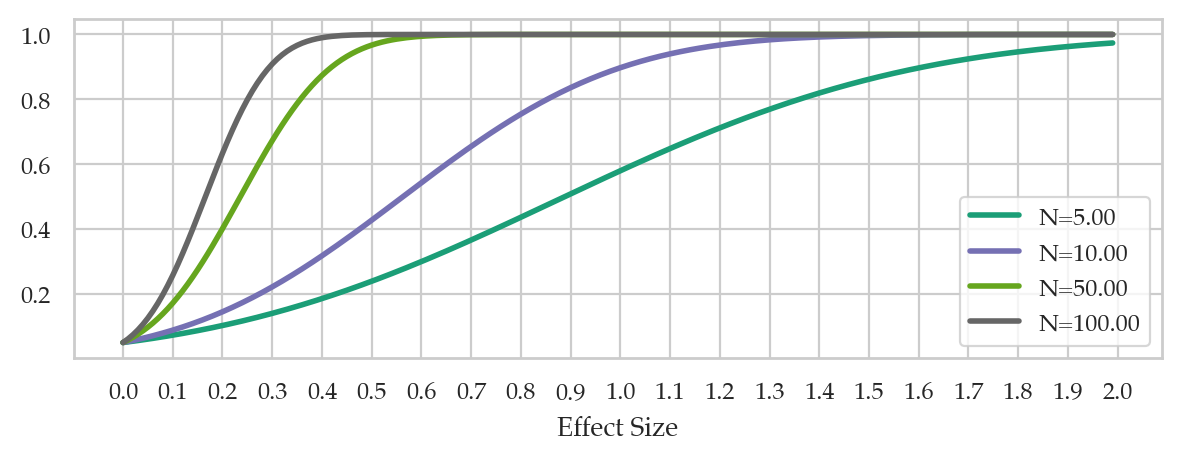

In [15]:
filename = os.path.join(DESTDIR, "plot_one_sample_t_power_vs_effect_size.pdf")
ds = np.arange(0, 2, 0.01)
ns = np.array([5, 10, 50, 100])
fig, ax = plt.subplots(figsize=(6,2.4))
ttp.plot_power(dep_var="effect size", ax=ax,
               effect_size=ds, nobs=ns, alpha=0.05,
               alternative="larger")
ax.set_xticks( np.arange(0, 2+0.1, 0.1) )
# ax.set_title("Power of t-test vs. effect size for different sample sizes")
ax.set_title(None)
savefigure(fig, filename)

In [16]:
kombuchapop = pd.read_csv("../datasets/kombuchapop.csv")
batch55pop = kombuchapop[kombuchapop["batch"]==55]
kpop55 = batch55pop["volume"]

In [17]:
np.random.seed(42)
n = 41  # rounding up
ksample55 = kpop55.sample(n)
len(ksample55)

41

In [18]:
# ksample55.values

In [19]:
from ministats import ttest_mean

ttest_mean(ksample55, mu0=1000)

0.43686918358182525

In [20]:
# ALT.
# from ministats import simulation_test_mean
# simulation_test_mean(ksample55, mu0=1000, sigma0=10)

## Example 2: comparison of East vs. West electricity prices 

In [21]:
#######################################################
eprices = pd.read_csv("../datasets/eprices.csv")
eprices.groupby("loc").describe()

price                                               
     count      mean       std  min  25%  50%   75%   max
loc                                                      
East   9.0  6.155556  0.877655  4.8  5.5  6.3   6.5   7.7
West   9.0  9.155556  1.562139  6.8  8.3  8.6  10.0  11.8

Need to calculate Cohen's $d$ that corresponds to the assumption $\Delta_{\text{min}} = 1$
and assuming the standard deviation of the population is $\sigma=1$.

In [22]:
Delta_min = 1
std_guess = 1

d_min = Delta_min / std_guess 

#### Solving for a desired power

The function `solve_power` takes as argument the chosen level of `power`,
and two of the three other design parameters `alpha`, `nobs1`, and `effect_size`,
and calculates the value of the third parameter required to achieve the chosen level of `power` $=(1-\beta)$.

In [23]:
from statsmodels.stats.power import TTestIndPower
ttindp = TTestIndPower()

# power of two-sample t-test assuming d_min and n=m=9 
ttindp.power(effect_size=d_min, nobs1=9, 
             alpha=0.05, alternative="larger")

0.6500703467709203

Saved figure to figures/stats/design/plot_two_sample_t_power_vs_sample_size.pdf
Saved figure to figures/stats/design/plot_two_sample_t_power_vs_sample_size.png


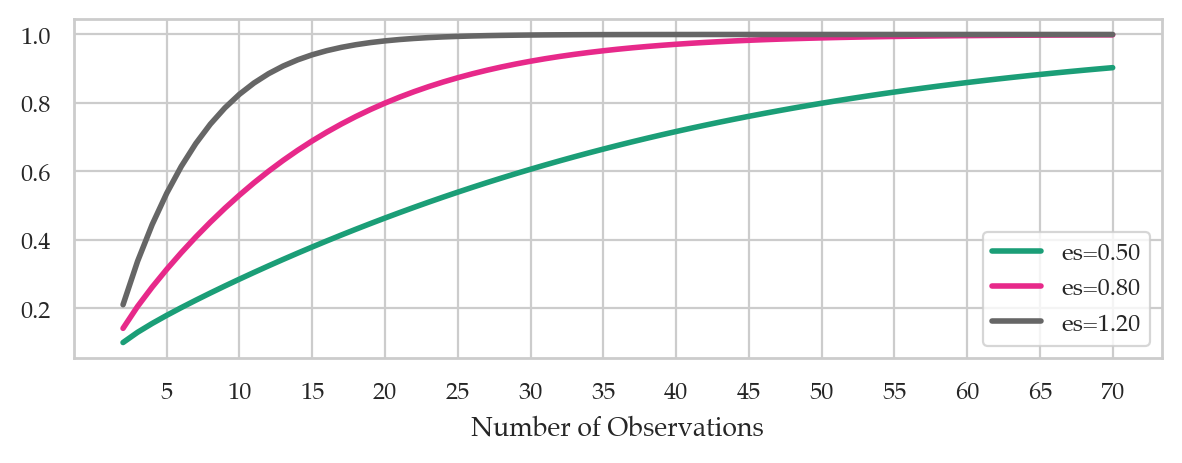

In [24]:
filename = os.path.join(DESTDIR, "plot_two_sample_t_power_vs_sample_size.pdf")
ds = np.array([0.5, 0.8, 1.2])
ns = np.arange(2, 71)
fig, ax = plt.subplots(figsize=(6,2.4))
ttindp.plot_power(dep_var="nobs", ax=ax,
                  effect_size=ds, nobs=ns, alpha=0.05,
                  alternative="larger")
ax.set_xticks( np.arange(5,75,5) )
# ax.set_title("Power of two-sample t-test vs. sample size $n=m$ for different effect sizes")
ax.set_title(None)
savefigure(fig, filename)

Saved figure to figures/stats/design/plot_two_sample_t_power_vs_effect_size.pdf
Saved figure to figures/stats/design/plot_two_sample_t_power_vs_effect_size.png


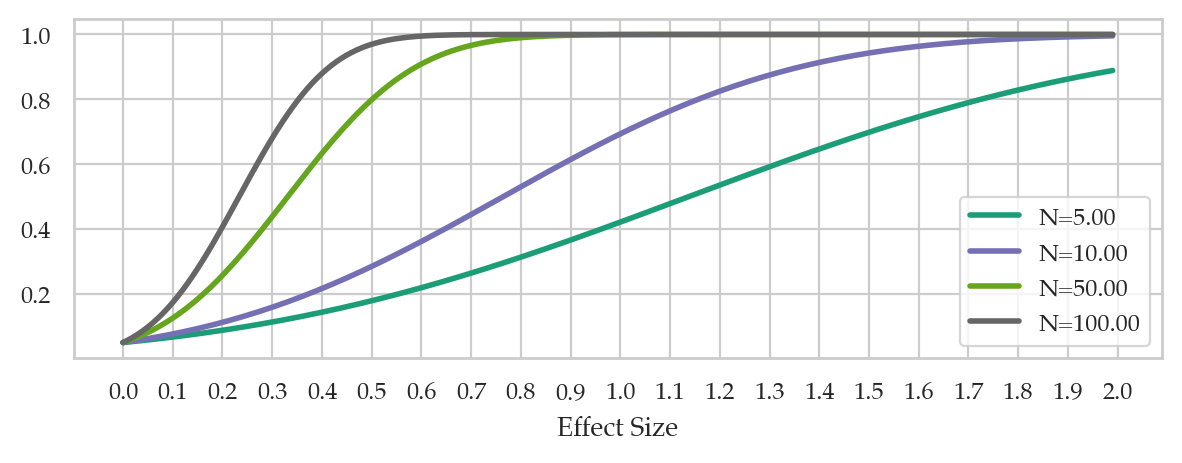

In [25]:
filename = os.path.join(DESTDIR, "plot_two_sample_t_power_vs_effect_size.pdf")
ds = np.arange(0, 2, 0.01)
ns = np.array([5, 10, 50, 100])
fig, ax = plt.subplots(figsize=(6,2.4))
ttindp.plot_power(dep_var="effect size", ax=ax,
                  effect_size=ds, nobs=ns, alpha=0.05,
                  alternative="larger")
ax.set_xticks( np.arange(0, 2+0.1, 0.1) )
# ax.set_title("Power of two-smaple t-test vs. effect size for different sample sizes")
ax.set_title(None)
savefigure(fig, filename)

#### Calculate minimum effect size

In [26]:
# minimum effect size to achieve 80% power when n=m=9
ttindp.solve_power(alpha=0.05, power=0.8, nobs1=9, alternative="larger")

1.2250749306456188

#### (optional) Calculate sample size needed to achieve 0.8 power

In [27]:
# minimum sample size required to achieve 80% power when effect size is d=1
ttindp.solve_power(effect_size=1.0, alpha=0.05, power=0.8, alternative="larger")
#######################################################

13.097761955067915

## Alternative calculation methods

### Using `pingouin`

In [28]:
import pingouin as pg

#### One-sample $t$-test

In [29]:
Delta_min = 0.4
pg.power_ttest(d=Delta_min, alpha=0.05, power=0.8,
               contrast="one-sample", alternative="greater")

40.02907615780519

In [30]:
# power of one-sample t-test assuming d=0.4 and n=41
pg.power_ttest(d=0.4, alpha=0.05, n=41,
               contrast="one-sample", alternative="greater")

0.8085822366975571

#### Two-sample $t$-test

In [31]:
# power of two-sample t-test assuming d_min and n=m=9 
pg.power_ttest(d=d_min, alpha=0.05, n=9,
               contrast="two-samples", alternative="greater")

0.6500703484783199

In [32]:
# minimum effect size to achieve 80% when n=m=9
pg.power_ttest(alpha=0.05, power=0.8, n=9,
               contrast="two-samples", alternative="greater")

1.225074919335032

In [33]:
# (optional) sample size required to achieve d_min at 80% power
pg.power_ttest(d=d_min, alpha=0.05, power=0.8,
               contrast="two-samples", alternative="greater")

13.09776161982688

### Using G*Power

TODO: add sceenshots

## Explanations

### Unique value proposition of hypothesis testing

### One-sided and two-sided rejection regions

In [34]:
from scipy.stats import t as tdist
rvT0 = tdist(df=9)

alpha = 0.05

# right-tailed rejection region
rvT0.ppf(alpha)

-1.8331129326536337

In [35]:
# left-tailed rejection region
rvT0.ppf(1-alpha)

1.8331129326536335

In [36]:
# two-sided rejection region
rvT0.ppf(alpha/2), rvT0.ppf(1 - alpha/2)

(-2.262157162740992, 2.262157162740991)

Saved figure to figures/stats/design/panel_rejection_regions_left_twotailed_right.pdf
Saved figure to figures/stats/design/panel_rejection_regions_left_twotailed_right.png


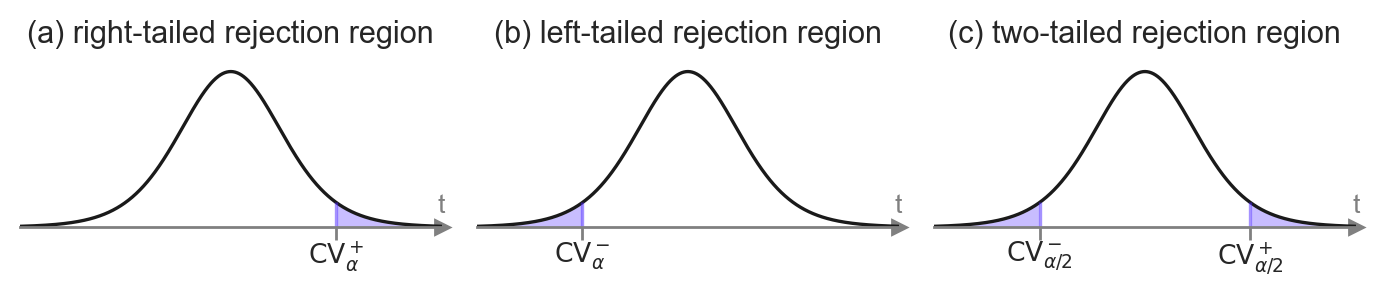

In [37]:
filename = os.path.join(DESTDIR, "panel_rejection_regions_left_twotailed_right.pdf")
    
from scipy.stats import t as tdist
rvT = tdist(df=9)

xs = np.linspace(-4, 4, 1000)
ys = rvT.pdf(xs)

# design choices
transp = 0.3
alpha_color = "#4A25FF"
beta_color = "#0CB0D6"
axis_color = "#808080"

def plot_rejection_region(ax, xs, ys, alt, title):
    ax.set_title(title, fontsize=11)

    # manually add arrowhead to x-axis + label t at the end
    ax.plot(1, 0, ">", color=axis_color, transform=ax.get_yaxis_transform(), clip_on=False)
    ax.set_xlabel("t")
    ax.xaxis.set_label_coords(1, 0.2)

    sns.lineplot(x=xs, y=ys, ax=ax, color="k")
    ax.set_xlim(-4, 4)
    ax.set_ylim(0, 0.42)
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.spines[['left', 'right', 'top']].set_visible(False)
    ax.spines['bottom'].set_color(axis_color)
    ax.tick_params(axis='x', colors=axis_color)
    ax.xaxis.label.set_color(axis_color)

    
    if alt == "greater":
        ax.set_xticks([2])
        # highlight the right tail
        mask = (xs > 2)
        ax.fill_between(xs[mask], y1=ys[mask], alpha=transp, facecolor=alpha_color)
        ax.vlines([2], ymin=0, ymax=rvT.pdf(2), linestyle="-", alpha=transp+0.2, color=alpha_color)
        ax.text(2, -0.03, r"$\mathrm{CV}_{\alpha}^+$", verticalalignment="top", horizontalalignment="center")

    elif alt == "less":
        ax.set_xticks([-2])
        # highlight the left tail
        mask = (xs < -2)
        ax.fill_between(xs[mask], y1=ys[mask], alpha=transp, facecolor=alpha_color)
        ax.vlines([-2], ymin=0, ymax=rvT.pdf(-2), linestyle="-", alpha=transp+0.2, color=alpha_color)
        ax.text(-2, -0.03, r"$\mathrm{CV}_{\alpha}^-$", verticalalignment="top", horizontalalignment="center")

    elif alt == "two-sided":
        ax.set_xticks([-2,2])
        # highlight the left and right tails
        mask = (xs < -2)
        ax.fill_between(xs[mask], y1=ys[mask], alpha=transp, facecolor=alpha_color)
        ax.vlines([-2], ymin=0, ymax=rvT.pdf(-2), linestyle="-", alpha=transp+0.2, color=alpha_color)
        ax.text(-2, -0.03, r"$\mathrm{CV}_{\alpha/2}^-$", verticalalignment="top", horizontalalignment="center")
        mask = (xs > 2)
        ax.fill_between(xs[mask], y1=ys[mask], alpha=transp, facecolor=alpha_color)
        ax.vlines([2], ymin=0, ymax=rvT.pdf(2), linestyle="-", alpha=transp+0.2, color=alpha_color)
        ax.text(2, -0.03, r"$\mathrm{CV}_{\alpha/2}^+$", verticalalignment="top", horizontalalignment="center")


with sns.axes_style("ticks"), plt.rc_context({"figure.figsize":(7,1.6)}):
    fig, (ax3, ax1, ax2) = plt.subplots(1,3)

    # RIGHT
    title = '(a) right-tailed rejection region'
    plot_rejection_region(ax3, xs, ys, "greater", title)

    # LEFT
    title = '(b) left-tailed rejection region'
    plot_rejection_region(ax1, xs, ys, "less", title)

    # TWO-TAILED
    title = '(c) two-tailed rejection region'
    plot_rejection_region(ax2, xs, ys, "two-sided", title)

savefigure(fig, filename)

#### Understanding the design formula

## Discussion

### Different types of power

### Limitations of hypothesis testing

### Perils of the hypothesis testing


## Exercises

## Links